# GSE161529 Notebook

## Table of Contents
1. [Introduction](#introduction)
2. [Imports](#imports)
3. [Path for Assets](#path-for-assets)
4. [Data Loading](#data-loading)

## Introduction

This notebook is the start of GSE161529 validation. It is designed to load and process single-cell RNA sequencing data from the GSE161529 dataset. The goal is to prepare the data for further analysis and validation.

## Imports

In [ ]:
# Necessary imports for the notebook. Please ensure these libraries are installed in your Python environment, 
# if not then please install them using the requirements.txt file.
import os
import tarfile
import scanpy as sc
import glob
import pandas as pd
import anndata as ad
from gtfparse import read_gtf
import urllib.request
import infercnvpy as cnv


## Path for Assets

In [4]:
# This is the relative path of the assets directory, if the assets are in another location please change the path accordingly.
assets = "../assets"

# Data Loading

In [5]:
# Output of this cell is truncated to avoid displaying too many files.
# This will list all the files in the GSE161529 directory.
all_matrix_files = glob.glob(f"{assets}/GSE161529/*")
matrix_files = sorted(set(f for f in all_matrix_files if f.endswith("-matrix.mtx")))
barcode_files = sorted(set(f for f in all_matrix_files if f.endswith("-barcodes.tsv")))
feature_file = f"{assets}/GSE161529/features.tsv"
matrix_file_names = sorted(set(f.split('\\')[-1].split('-matrix')[0] for f in all_matrix_files if f.endswith("-matrix.mtx")))
# matrix_files, barcode_files, feature_file, matrix_file_names

In [ ]:
# This block takes a really long time to run, so please be patient.
# If you are running this locally on a machine please check if you have enough resources available.
# If not then please run this on a cloud platform like Google Colab or Kaggle.
def load_adata(matrix_files=barcode_files, barcode_files=barcode_files, matrix_file_names=matrix_file_names, feature_file=feature_file):
    """
    Load multiple AnnData objects from matrix and barcode files.
    Args:
        matrix_files (list): List of file paths to the matrix files.
        barcode_files (list): List of file paths to the barcode files.
        matrix_file_names (list): List of names corresponding to the matrix files for batch categorization.
        feature_file (str): File path to the features file.
    Returns:
        list: List of AnnData objects loaded from the provided files.
    """
    features = pd.read_csv(feature_file, sep="\t", header=None)
    list_data = []

    for i, (matrix_file, barcode_file) in enumerate(zip(matrix_files, barcode_files)):
        matrix_file_name = matrix_file.split('\\')[-1].split("-matrix")[0]
        barcode_file_name = barcode_file.split('\\')[-1].split("-barcodes")[0]
        data = sc.read_mtx(matrix_file).T
        barcodes = pd.read_csv(barcode_file, header=None)
        data.var_names = features[0].astype(str)
        data.obs_names = barcodes[0].astype(str)
        data.var_names_make_unique()
        data.obs["sample"] = matrix_file_name
        list_data.append(data)
        print(f"Successfully loaded: {i+1}: {matrix_file_name}-matrix.mtx with {data.n_obs} cells along with {barcode_file_name}-barcodes.tsv obs_names")
    # adata = list_data[0].concatenate(list_data[1:], join="outer", batch_key="sample_id", batch_categories=matrix_file_names)
    adata = ad.concat(list_data, join="outer", label="sample_id", keys=matrix_file_names)
    return adata

In [7]:
adata = load_adata(matrix_files=matrix_files, barcode_files=barcode_files,matrix_file_names=matrix_file_names, feature_file=feature_file)

Successfully loaded: 1: GSM4909253_N-PM0092-Total-matrix.mtx with 4966 cells along with GSM4909253_N-PM0092-Total-barcodes.tsv obs_names
Successfully loaded: 2: GSM4909254_N-PM0019-Total-matrix.mtx with 7130 cells along with GSM4909254_N-PM0019-Total-barcodes.tsv obs_names
Successfully loaded: 3: GSM4909255_N-N280-Epi-matrix.mtx with 1198 cells along with GSM4909255_N-N280-Epi-barcodes.tsv obs_names
Successfully loaded: 4: GSM4909256_N-PM0095-Epi-matrix.mtx with 9879 cells along with GSM4909256_N-PM0095-Epi-barcodes.tsv obs_names
Successfully loaded: 5: GSM4909257_N-PM0095-Total-matrix.mtx with 7412 cells along with GSM4909257_N-PM0095-Total-barcodes.tsv obs_names
Successfully loaded: 6: GSM4909258_N-NF-Epi-matrix.mtx with 3015 cells along with GSM4909258_N-NF-Epi-barcodes.tsv obs_names
Successfully loaded: 7: GSM4909259_N-NE-Epi-matrix.mtx with 3089 cells along with GSM4909259_N-NE-Epi-barcodes.tsv obs_names
Successfully loaded: 8: GSM4909260_N-N1105-Epi-matrix.mtx with 5201 cells alo

C:\Users\Haider-Rizvi\AppData\Local\Temp\ipykernel_11232\3563408770.py:29: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = list_data[0].concatenate(list_data[1:], join="outer", batch_key="sample_id", batch_categories=matrix_file_names)


In [8]:
adata.obs.head()

,sample,sample_id
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total


In [9]:
# Recompute QC metrics
adata.obs["nCount_RNA"] = adata.X.sum(axis=1).A1

# Identify mitochondrial genes (usually start with "MT-")
adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')

# Calculate QC metrics including percent.mito
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# The result is stored in adata.obs['pct_counts_mt']
adata.obs['percent.mito'] = adata.obs['pct_counts_mt']

# round for readability
adata.obs['percent.mito'] = adata.obs['percent.mito'].round(2)

adata.obs.head()


,sample,sample_id,nCount_RNA,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,percent.mito
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,1359,3587.0,0.0,0.0,0.0
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,510,1003.0,0.0,0.0,0.0
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,7536.0,1893,7536.0,0.0,0.0,0.0
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,10366.0,2595,10366.0,0.0,0.0,0.0
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1628.0,734,1628.0,0.0,0.0,0.0


In [10]:
# Print some gene names to inspect
adata.var_names

Index(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000239906',
       'ENSG00000241599', 'ENSG00000236601', 'ENSG00000284733',
       'ENSG00000235146',
       ...
       'ENSG00000277196', 'ENSG00000277630', 'ENSG00000278384',
       'ENSG00000278633', 'ENSG00000276345', 'ENSG00000277856',
       'ENSG00000275063', 'ENSG00000271254', 'ENSG00000277475',
       'ENSG00000268674'],
      dtype='object', length=33538)

In [11]:
# Drop unnecessary QC columns from adata.obs
adata.obs = adata.obs.drop(columns=['pct_counts_mt', 'total_counts', 'total_counts_mt', 'n_genes_by_counts'], errors='ignore')
adata.obs

,sample,sample_id,nCount_RNA,percent.mito
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,0.0
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.0
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,7536.0,0.0
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,10366.0,0.0
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1628.0,0.0
...,...,...,...,...
TTTGTCACATCGATTG-1-GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,2292.0,0.0
TTTGTCACATGTTCCC-1-GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,2283.0,0.0
TTTGTCAGTAATTGGA-1-GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,604.0,0.0
TTTGTCATCATGTCCC-1-GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,GSM4909321_mER-MH0068-LN,1954.0,0.0


In [ ]:
gtf = read_gtf(f"""{assets}/Gencode/gencode.v44.annotation.gtf""").to_pandas()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


,gene_id,gene_name,gene_id_clean
0,ENSG00000290825.1,DDX11L2,ENSG00000290825
5,ENSG00000223972.6,DDX11L1,ENSG00000223972
13,ENSG00000227232.5,WASH7P,ENSG00000227232
26,ENSG00000278267.1,MIR6859-1,ENSG00000278267
29,ENSG00000243485.5,MIR1302-2HG,ENSG00000243485
...,...,...,...
3424170,ENSG00000198695.2,MT-ND6,ENSG00000198695
3424175,ENSG00000210194.1,MT-TE,ENSG00000210194
3424178,ENSG00000198727.2,MT-CYB,ENSG00000198727
3424183,ENSG00000210195.2,MT-TT,ENSG00000210195


In [ ]:
genes = gtf[gtf["feature"] == "gene"][["gene_id", "gene_name"]].drop_duplicates()
genes["gene_id_clean"] = genes["gene_id"].str.replace(r"\..*", "", regex=True)
genes

In [13]:
# Create mapping
ens_to_symbol = dict(zip(genes["gene_id_clean"], genes["gene_name"]))

# Map gene symbols in adata.var
adata.var["ensembl_id"] = adata.var_names.str.replace(r"\..*", "", regex=True)
adata.var["gene_name"] = adata.var["ensembl_id"].map(ens_to_symbol)

# Fill missing symbols with Ensembl ID, then set .var_names and ensure all entries are strings
adata.var["gene_name_clean"] = (adata.var["gene_name"].fillna(adata.var["ensembl_id"])).astype(str)

# Set .var_names safely
adata.var_names = adata.var["gene_name_clean"]
adata.var_names_make_unique()

adata.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'ENSG00000238009', 'ENSG00000239945',
       'ENSG00000239906', 'ENSG00000241599', 'ENSG00000236601', 'OR4F29',
       'ENSG00000235146',
       ...
       'ENSG00000277196', 'ENSG00000277630', 'ENSG00000278384',
       'ENSG00000278633', 'ENSG00000276345', 'ENSG00000277856',
       'ENSG00000275063', 'ENSG00000271254', 'ENSG00000277475',
       'ENSG00000268674'],
      dtype='object', name='gene_name_clean', length=33538)

In [14]:
# Identify ribosomal genes (RPS or RPL)
ribo_genes = [g for g in adata.var_names if g.startswith("RPS") or g.startswith("RPL")]

# Total and ribosomal counts
total_counts = adata.X.sum(axis=1).A1
ribo_counts = adata[:, ribo_genes].X.sum(axis=1).A1

# Add to .obs
adata.obs['pct_counts_ribo'] = (ribo_counts / total_counts) * 100

adata.obs['pct_counts_ribo'].describe()

count    428024.000000
mean         23.449614
std          10.560281
min           0.000000
25%          16.576088
50%          23.105051
75%          29.666750
max          82.282913
Name: pct_counts_ribo, dtype: float64

## Gene Lists and Filtering

In [15]:
# Genes for cell cycle phases
s_genes = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2',
    'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MCM10', 'HELLS', 'RFC2', 'RPA2',
    'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3',
    'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1',
    'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8'
]

g2m_genes = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80',
    'CKS2', 'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A',
    'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E',
    'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDC20', 'TTK', 'CDC25C', 'KIF2C',
    'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA3', 'HN1', 'CDC45', 'CDCA8', 'ECT2',
    'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE',
    'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'
]

apoptosis_genes = [
    'BAX', 'BAK1', 'CASP3', 'CASP8', 'BCL2L11', 'FAS', 'TP53', 'BBC3', 'CYCS'
]

oxphos_genes = [
    "ATP5F1A", "ATP5F1B", "ATP5MC1", "ATP5MC2", "ATP5ME", "ATP5MG",
    "COX4I1", "COX5A", "COX6A1", "COX6C", "NDUFA1", "NDUFA2", "NDUFA4",
    "NDUFAB1", "NDUFB2", "NDUFB3", "NDUFS1", "NDUFS2", "NDUFV1", "UQCRC1",
    "UQCRC2", "UQCRH", "SDHA", "SDHB", "SDHC", "SDHD", "CYCS"
]

proto_oncogenes = [
    'MYC', 'KRAS', 'EGFR', 'BRAF', 'AKT1', 'PIK3CA', 'CCND1', 'ERBB2', 'FGFR1', 'MDM2'
]

In [ ]:
oxphos_genes_present = [g for g in oxphos_genes if g in adata.var_names]
sc.tl.score_genes(adata, gene_list=oxphos_genes_present, score_name="oxphos_score")
print(f"OxPhos genes used: {len(oxphos_genes_present)}")

OxPhos genes used: 27


In [17]:
adata.obs["oxphos_score"].describe()

count    428024.000000
mean          0.753553
std           1.715274
min          -6.576720
25%           0.046863
50%           0.259259
75%           0.780045
max          74.940287
Name: oxphos_score, dtype: float64

In [19]:
apoptosis_genes_present = [g for g in apoptosis_genes if g in adata.var_names]
sc.tl.score_genes(adata, gene_list=apoptosis_genes_present, score_name="apoptosis_score")
print(f"Apoptosis genes found in dataset: {len(apoptosis_genes_present)}")

Apoptosis genes found in dataset: 9


In [20]:
adata.obs["apoptosis_score"].describe()

count    428024.000000
mean         -0.107854
std           0.494533
min         -74.192771
25%          -0.194110
50%          -0.064257
75%           0.034806
max          17.618474
Name: apoptosis_score, dtype: float64

In [21]:
s_genes_present = [g for g in s_genes if g in adata.var_names]
g2m_genes_present = [g for g in g2m_genes if g in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_present, g2m_genes=g2m_genes_present)

print(f"S phase genes found: {len(s_genes_present)}")
print(f"G2M phase genes found: {len(g2m_genes_present)}")

S phase genes found: 43
G2M phase genes found: 52


In [22]:
adata.obs["S_score"].describe()

count    428024.000000
mean         -0.235933
std           0.451921
min         -36.937984
25%          -0.282946
50%          -0.110465
75%          -0.040698
max           7.081395
Name: S_score, dtype: float64

In [23]:
adata.obs["G2M_score"].describe()


count    428024.000000
mean         -0.195857
std           0.729401
min         -44.064685
25%          -0.266317
50%          -0.100816
75%          -0.036713
max          34.794872
Name: G2M_score, dtype: float64

In [24]:
adata.obs.head()

,sample,sample_id,nCount_RNA,percent.mito,pct_counts_ribo,oxphos_score,apoptosis_score,S_score,G2M_score,phase
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,0.0,34.011711,0.625094,-0.107095,-0.267442,-0.172494,G1
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.0,41.375874,0.034769,-0.088353,-0.042636,-0.047786,G1
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,7536.0,0.0,34.262207,0.494331,1.516734,-0.428295,-0.325175,G1
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,10366.0,0.0,27.532318,1.197279,-0.373494,-0.451550,-0.168998,G1
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1628.0,0.0,29.545454,-0.016629,0.073628,-0.058140,-0.006993,G1


In [ ]:
genes = gtf[gtf["feature"] == "gene"]
gene_pos = genes[["gene_name", "seqname", "start", "end"]].drop_duplicates()
gene_pos.columns = ["gene", "chromosome", "start", "end"]

In [25]:
##STEP 2: Merge gene location with adata.var
# Match gene names
adata.var["gene"] = adata.var_names
gene_pos_filtered = gene_pos[gene_pos["gene"].isin(adata.var["gene"])].drop_duplicates(subset="gene")
gene_pos_filtered = gene_pos_filtered.set_index("gene")

# Merge and reindex
merged_var = adata.var.join(gene_pos_filtered, on="gene")
merged_var = merged_var.reindex(adata.var_names)
adata.var = merged_var

print("✅ Chromosomal annotations added to adata.var")

NameError: name 'gene_pos' is not defined

In [ ]:
adata.obs.head(2)

,sample,sample_id,nCount_RNA,percent.mito,pct_counts_ribo,oxphos_score,apoptosis_score,S_score,G2M_score,phase
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,0.0,34.011711,0.625094,-0.135342,-0.267442,-0.172494,G1
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.0,41.375874,0.034769,0.062697,-0.042636,-0.047786,G1


In [ ]:
## cnv_inference did not work as cnv_reference was not defined till this point.
adata.obs["cnv_reference"].value_counts()


KeyError: 'cnv_reference'

In [ ]:
## cnv_inference was defined at this stage after putting the criteria as cells less than 5% of nCount_RNA as normal.
import numpy as np
import infercnvpy as cnv

# Step 1: Label all as tumor
adata.obs["cnv_reference"] = "tumor"

# Step 2: Define pseudonormal reference group (bottom 5% by nCount_RNA)
low_count_threshold = np.percentile(adata.obs["nCount_RNA"], 5)
pseudo_normal_idx = adata.obs[adata.obs["nCount_RNA"] <= low_count_threshold].index
adata.obs.loc[pseudo_normal_idx, "cnv_reference"] = "normal"

# ✅ Check reference group distribution
print("📊 CNV reference group counts:")
print(adata.obs["cnv_reference"].value_counts())

# Step 3: Run inferCNV
cnv.tl.infercnv(
    adata,
    reference_key="cnv_reference",
    reference_cat="normal",
    window_size=100,
    step=10,
    n_jobs=4
)




📊 CNV reference group counts:
cnv_reference
tumor     406516
normal     21508
Name: count, dtype: int64


  0%|          | 0/86 [00:00<?, ?it/s]

In [ ]:
adata.obs.head(2)

,sample,sample_id,nCount_RNA,percent.mito,pct_counts_ribo,oxphos_score,apoptosis_score,S_score,G2M_score,phase,cnv_reference
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,0.0,34.011711,0.625094,-0.135342,-0.267442,-0.172494,G1,tumor
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.0,41.375874,0.034769,0.062697,-0.042636,-0.047786,G1,tumor


In [ ]:
import numpy as np

# Convert sparse matrix to dense and compute standard deviation across rows
adata.obs["cnv_score"] = np.std(adata.obsm["X_cnv"].toarray(), axis=1)



In [ ]:
adata.obs["cnv_score"].describe()


count    428024.000000
mean          0.033367
std           0.028926
min           0.000000
25%           0.013010
50%           0.025572
75%           0.043778
max           0.268056
Name: cnv_score, dtype: float64

In [ ]:
adata.obs.head(2)

,sample,sample_id,nCount_RNA,percent.mito,pct_counts_ribo,oxphos_score,apoptosis_score,S_score,G2M_score,phase,cnv_reference,cnv_score
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,0.0,34.011711,0.625094,-0.135342,-0.267442,-0.172494,G1,tumor,0.019013
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.0,41.375874,0.034769,0.062697,-0.042636,-0.047786,G1,tumor,0.006503


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_9902/2201358287.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=adata_all.obs, x="cnv_reference", y="cnv_score", scale="width", inner="box")


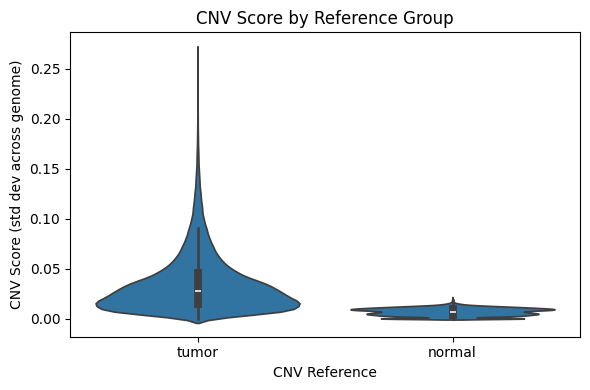

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.violinplot(data=adata.obs, x="cnv_reference", y="cnv_score", scale="width", inner="box")
plt.title("CNV Score by Reference Group")
plt.ylabel("CNV Score (std dev across genome)")
plt.xlabel("CNV Reference")
plt.tight_layout()
plt.show()


In [ ]:
# List of proto-oncogenes
proto_oncogenes = ['MYC', 'KRAS', 'EGFR', 'BRAF', 'AKT1', 'PIK3CA', 'CCND1', 'ERBB2', 'FGFR1', 'MDM2']

# Check which of these genes are present in the data
available_genes = [gene for gene in proto_oncogenes if gene in adata.var_names]
missing_genes = list(set(proto_oncogenes) - set(available_genes))

print(f"✅ Genes found: {available_genes}")
print(f"❌ Genes missing: {missing_genes}")

# Compute proto-oncogene score: mean expression across available genes
adata.obs["proto_oncogenescore"] = adata[:, available_genes].X.mean(axis=1)


✅ Genes found: ['MYC', 'KRAS', 'EGFR', 'BRAF', 'AKT1', 'PIK3CA', 'CCND1', 'ERBB2', 'FGFR1', 'MDM2']
❌ Genes missing: []


In [ ]:
adata.obs.to_csv(f"{assets}/GSE161529/GSE161529_obs.csv")


##### All the codes above are for adding features to GSE161529 saved as csv which was used for GSE161529 cross-validation in Collab.

In [ ]:
##STEP 3: Define reference group using Normal Epithelial cells
# Create reference labels
adata.obs["cnv_reference"] = "tumor"
#adata.obs.loc[adata.obs["celltype_major"] == "Normal Epithelial", "cnv_reference"] = "normal"

print("🔍 CNV reference group counts:\n", adata.obs["cnv_reference"].value_counts())

## STEP 4: Run inferCNV with infercnvpy
import infercnvpy as cnv

cnv.tl.infercnv(
    adata,
    reference_key="cnv_reference",
    reference_cat="normal",
    window_size=100,
    step=10,
    n_jobs=4  # Adjust depending on your CPU
)

print("✅ CNV inference completed.")


🔍 CNV reference group counts:
 cnv_reference
tumor    428024
Name: count, dtype: int64


ValueError: The following reference categories were not found in adata.obs[reference_key]: ['normal']

In [8]:
import pandas as pd

# Load the prediction CSV generated in Colab
df_val_clean = pd.read_csv(
    "~/Desktop/Capstone/Notebook recent/GSE161529_predictions_nomito.csv",
    index_col=0
)

print("✅ df_val_clean loaded.")



✅ df_val_clean loaded.


In [ ]:
for name in adata.obs_names[:10]:
    print(name)





AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total
AAACCTGTCAAGGTAA-1-GSM4909253_N-PM0092-Total
AAACGGGAGAGGTAGA-1-GSM4909253_N-PM0092-Total
AAACGGGAGATGGCGT-1-GSM4909253_N-PM0092-Total
AAACGGGAGATTACCC-1-GSM4909253_N-PM0092-Total
AAACGGGAGCACCGCT-1-GSM4909253_N-PM0092-Total


In [ ]:
# Extract the base cell ID before the first two dashes (e.g., "AAACCTGAGACTAGGC-1")
# Split on dash and rejoin first two parts
adata.obs["cell_id_short"] = adata.obs_names.str.split("-").str[:2].str.join("-")

print(adata.obs["cell_id_short"].head())



AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total    AAACCTGAGACTAGGC-1
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total    AAACCTGAGGACAGAA-1
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total    AAACCTGAGGATGTAT-1
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total    AAACCTGCAAGAGGCT-1
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total    AAACCTGGTAGCTTGT-1
Name: cell_id_short, dtype: object


In [13]:
import pandas as pd

# ✅ Specify index_col=0 to use cell barcodes as index
df_val_clean = pd.read_csv(
   "~/Desktop/Capstone/Notebook recent/GSE161529_predictions_nomito.csv",
   index_col=0
)
# Set cell barcodes as index
df_val_clean = df_val_clean.set_index("Unnamed: 0")

# Confirm
print(df_val_clean.index[:5].tolist())



['AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total', 'AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total', 'AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total', 'AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total', 'AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total']


In [14]:
# Extract short cell ID (cell-barcode-1) from long index
df_val_clean["cell_id_short"] = df_val_clean.index.str.split("-").str[:2].str.join("-")

# Set as index
df_val_clean = df_val_clean.set_index("cell_id_short")

# Confirm it's fixed
print(df_val_clean.index[:5].tolist())


['AAACCTGAGACTAGGC-1', 'AAACCTGAGGACAGAA-1', 'AAACCTGAGGATGTAT-1', 'AAACCTGCAAGAGGCT-1', 'AAACCTGGTAGCTTGT-1']


In [ ]:
# Make sure obs index matches short cell IDs
adata.obs["cell_id_short"] = adata.obs_names.str.split("-").str[:2].str.join("-")

# Features to map
cols_to_map = [
    "tumor_pred_nomito", "tumor_prob_nomito", "tumor_pred_label_nomito",
    "nCount_RNA", "pct_counts_ribo", "oxphos_score", "apoptosis_score",
    "S_score", "G2M_score", "proto_oncogenescore", "cnv_score"
]

# Map from df_val_clean using the short index
for col in cols_to_map:
    adata.obs[col] = adata.obs["cell_id_short"].map(df_val_clean[col])

print("✅ Successfully mapped predictions and features into adata.obs.")


✅ Successfully mapped predictions and features into adata_all.obs.


In [ ]:
# Deduplicate df_val_clean before mapping
df_val_clean = df_val_clean[~df_val_clean.index.duplicated(keep='first')]

# Now safely map
for col in cols_to_map:
    adata.obs[col] = adata.obs["cell_id_short"].map(df_val_clean[col])

print("✅ Successfully mapped predictions and features into adata.obs (after deduplication).")
dup_count = df_val_clean.index.duplicated().sum()
print(f"❗ Removed {dup_count} duplicate entries from df_val_clean.")


✅ Successfully mapped predictions and features into adata_all.obs (after deduplication).
❗ Removed 0 duplicate entries from df_val_clean.


In [ ]:
# Make sure obs index matches short cell IDs
adata.obs["cell_id_short"] = adata.obs_names.str.split("-").str[:2].str.join("-")

# Features to map
cols_to_map = [
    "tumor_pred_nomito", "tumor_prob_nomito", "tumor_pred_label_nomito",
    "nCount_RNA", "pct_counts_ribo", "oxphos_score", "apoptosis_score",
    "S_score", "G2M_score", "proto_oncogenescore", "cnv_score"
]

# Map from df_val_clean using the short index
for col in cols_to_map:
    adata.obs[col] = adata.obs["cell_id_short"].map(df_val_clean[col])

print("✅ Successfully mapped predictions and features into adata.obs.")


✅ Successfully mapped predictions and features into adata_all.obs.


In [ ]:
# Restore full obs_names as the index
adata.obs.index = adata.obs_names
# Make a short ID column to match df_val_clean
adata.obs["cell_id_short"] = adata.obs_names.str.split("-").str[:2].str.join("-")

# Map predictions from df_val_clean
adata.obs["tumor_pred_nomito"] = adata.obs["cell_id_short"].map(df_val_clean["tumor_pred_nomito"])
adata.obs["tumor_prob_nomito"] = adata.obs["cell_id_short"].map(df_val_clean["tumor_prob_nomito"])
adata.obs["tumor_pred_label_nomito"] = adata.obs["cell_id_short"].map(df_val_clean["tumor_pred_label_nomito"])

print("✅ Successfully mapped predictions into adata.obs using cell_id_short")


✅ Successfully mapped predictions into adata_all.obs using cell_id_short


In [ ]:
dups = df_val_clean.index[df_val_clean.index.duplicated()]
print(f"❗ Duplicate index entries in df_val_clean: {len(dups)}")
# Step 1: Remove duplicates (keep first occurrence)
df_val_clean_dedup = df_val_clean[~df_val_clean.index.duplicated(keep="first")]

# Step 2: Map predictions safely
adata.obs["tumor_pred_nomito"] = adata.obs["cell_id_short"].map(df_val_clean_dedup["tumor_pred_nomito"])
adata.obs["tumor_prob_nomito"] = adata.obs["cell_id_short"].map(df_val_clean_dedup["tumor_prob_nomito"])
adata.obs["tumor_pred_label_nomito"] = adata.obs["cell_id_short"].map(df_val_clean_dedup["tumor_pred_label_nomito"])

# Step 3: Confirm success
print("✅ Mapped predictions into adata.obs using deduplicated df_val_clean")
print(adata.obs[["cell_id_short", "tumor_pred_label_nomito"]].dropna().head())


❗ Duplicate index entries in df_val_clean: 0
✅ Mapped predictions into adata_all.obs using deduplicated df_val_clean
                                                   cell_id_short  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  AAACCTGAGACTAGGC-1   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  AAACCTGAGGACAGAA-1   
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total  AAACCTGAGGATGTAT-1   
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total  AAACCTGCAAGAGGCT-1   
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total  AAACCTGGTAGCTTGT-1   

                                             tumor_pred_label_nomito  
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total         Predicted Tumor  
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total         Predicted Tumor  
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total         Predicted Tumor  
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total         Predicted Tumor  
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total         Predicted Tumor  


In [ ]:
print("🔢 Tumor prediction counts:")
print(adata.obs["tumor_pred_label_nomito"].value_counts())
features = [
    "nCount_RNA", "pct_counts_ribo", "oxphos_score", "apoptosis_score",
    "S_score", "G2M_score", "proto_oncogenescore", "cnv_score", "tumor_prob_nomito"
]

summary_df = adata.obs.groupby("tumor_pred_label_nomito")[features].mean().T.round(3)
display(summary_df)


🔢 Tumor prediction counts:
tumor_pred_label_nomito
Predicted Tumor     409024
Predicted Normal     19000
Name: count, dtype: int64


tumor_pred_label_nomito,Predicted Normal,Predicted Tumor
nCount_RNA,5672.902,5564.847
pct_counts_ribo,22.830,23.575
oxphos_score,0.308,0.748
apoptosis_score,-0.051,0.010
S_score,-0.283,-0.248
G2M_score,-0.281,-0.203
proto_oncogenescore,0.308,0.748
cnv_score,0.196,0.192
tumor_prob_nomito,0.301,0.957


In [ ]:
# Canonical oncogenes and tumor suppressors
genes_of_interest = [
    # ✅ Oncogenes
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2",
    
    # ✅ Tumor Suppressors
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]

# Filter for genes actually present in your data
valid_genes = [gene for gene in genes_of_interest if gene in adata.var_names]
print(f"✅ Genes found in dataset: {valid_genes}")


✅ Genes found in dataset: []


In [ ]:
print(adata.var_names[:10].tolist())


['MIR1302-2HG_ENSG00000243485_ENSG00000243485', 'FAM138A_ENSG00000237613_ENSG00000237613', 'OR4F5_ENSG00000186092_ENSG00000186092', 'ENSG00000238009_ENSG00000238009_ENSG00000238009', 'ENSG00000239945_ENSG00000239945_ENSG00000239945', 'ENSG00000239906_ENSG00000239906_ENSG00000239906', 'ENSG00000241599_ENSG00000241599_ENSG00000241599', 'ENSG00000236601_ENSG00000236601_ENSG00000236601', 'OR4F29_ENSG00000284733_ENSG00000284733', 'ENSG00000235146_ENSG00000235146_ENSG00000235146']


In [ ]:
# Step 1: Remove or handle NaNs in gene_name
adata.var["gene_name"] = adata.var["gene_name"].fillna("Unknown")

# Optionally append Ensembl ID to Unknowns to keep them unique
adata.var["gene_name"] = adata.var["gene_name"] + "_" + adata.var["ensembl_id"]

# Step 2: Assign and make unique
adata.var_names = adata.var["gene_name"]
adata.var_names_make_unique()

# Step 3: Confirm
print(adata.var_names[:10])


Index(['MIR1302-2HG_ENSG00000243485_ENSG00000243485',
       'FAM138A_ENSG00000237613_ENSG00000237613',
       'OR4F5_ENSG00000186092_ENSG00000186092',
       'ENSG00000238009_ENSG00000238009_ENSG00000238009',
       'ENSG00000239945_ENSG00000239945_ENSG00000239945',
       'ENSG00000239906_ENSG00000239906_ENSG00000239906',
       'ENSG00000241599_ENSG00000241599_ENSG00000241599',
       'ENSG00000236601_ENSG00000236601_ENSG00000236601',
       'OR4F29_ENSG00000284733_ENSG00000284733',
       'ENSG00000235146_ENSG00000235146_ENSG00000235146'],
      dtype='object', name='gene_name')


In [ ]:
# Define gene symbols of interest
genes_of_interest_symbols = [
    # Oncogenes
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2",
    # Tumor suppressors
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]

# Match those in the current var_names (by checking gene_name prefix)
valid_genes = [name for name in adata.var_names if name.split("_")[0] in genes_of_interest_symbols]

# Subset AnnData for just those genes
adata_onco = adata[:, valid_genes].copy()

print(f"✅ Found {len(valid_genes)} genes of interest in dataset.")


✅ Found 40 genes of interest in dataset.


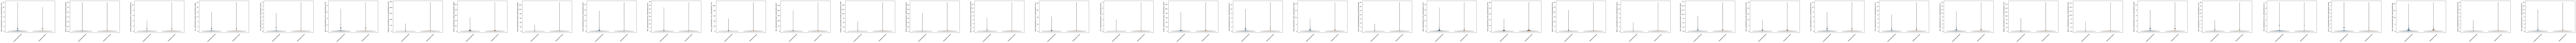

In [ ]:
import scanpy as sc

# Optional: focus on a subset for readability
#genes_to_plot = ["TP53", "EGFR", "MYC", "BRCA1", "CDKN2A"]
genes_to_plot = [
    # Oncogenes
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2",
    # Tumor suppressors
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]
# Adjust gene names to match your var_names format (GENESYMBOL_ENSGID)
genes_to_plot_full = [
    gene for gene in adata.var_names if gene.split("_")[0] in genes_to_plot
]

# Plot violin plots split by prediction label
sc.pl.violin(
    adata,
    keys=genes_to_plot_full,
    groupby="tumor_pred_label_nomito",
    rotation=45,
    stripplot=False,
    jitter=False,
    multi_panel=True
)


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_7544/2822736226.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = X.groupby("tumor_label").mean()


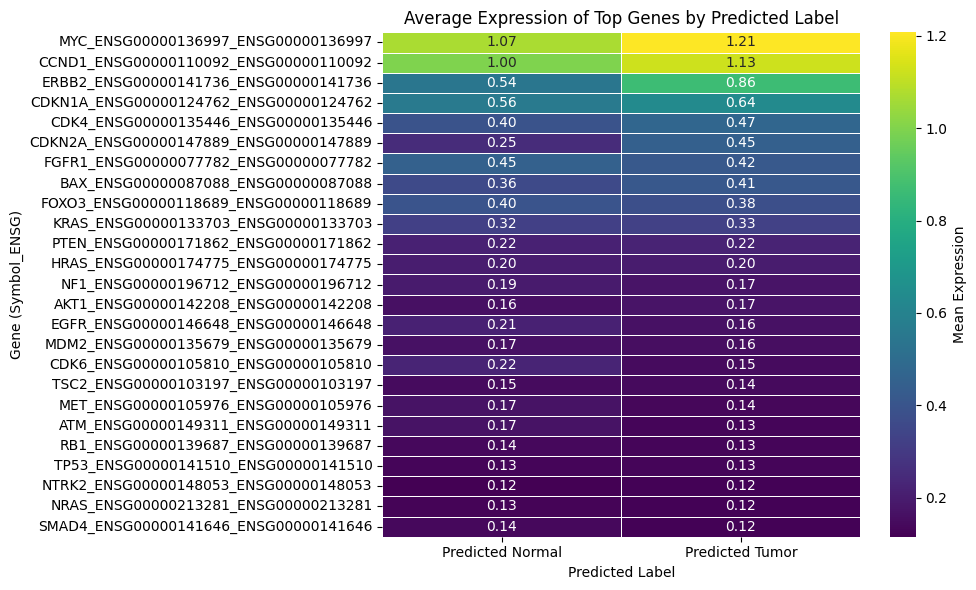

In [ ]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define genes of interest
oncogenes = [
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2"
]
tumor_suppressors = [
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]
genes_of_interest = oncogenes + tumor_suppressors

# Step 2: Match genes to adata.var_names (formatted like 'TP53_ENSG...')
genes_matched = [g for g in adata.var_names if g.split("_")[0] in genes_of_interest]

# Step 3: Create DataFrame of expression values
X = adata[:, genes_matched].to_df()
X["tumor_label"] = adata.obs["tumor_pred_label_nomito"].values

# Step 4: Compute mean expression in tumor cells and sort genes
means = X.groupby("tumor_label").mean()
tumor_means = means.loc["Predicted Tumor"]
sorted_genes = tumor_means.sort_values(ascending=False).index.tolist()

# Optional: top N genes
top_n = 25
top_genes = sorted_genes[:top_n]

# Step 5: Plot summary heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    means[top_genes].T,  # transpose for genes as rows
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Mean Expression"}
)
plt.title("Average Expression of Top Genes by Predicted Label")
plt.xlabel("Predicted Label")
plt.ylabel("Gene (Symbol_ENSG)")
plt.tight_layout()
plt.show()


✅ Differentially expressed oncogenes (p < 0.05):


,gene,p_value,log2_fc
17,ERBB2_ENSG00000141736_ENSG00000141736,1.892117e-36,0.664445
4,CDK6_ENSG00000105810_ENSG00000105810,9.054751e-32,-0.594784
14,CDK4_ENSG00000135446_ENSG00000135446,6.627029e-16,0.244647
3,EGFR_ENSG00000146648_ENSG00000146648,2.334000e-13,-0.383925
12,FGFR2_ENSG00000066468_ENSG00000066468,7.131804e-10,-0.563740
9,NOTCH1_ENSG00000148400_ENSG00000148400,4.464094e-07,-0.274851
11,CCND1_ENSG00000110092_ENSG00000110092,4.806082e-07,0.174280
5,MET_ENSG00000105976_ENSG00000105976,4.984608e-07,-0.314952
7,MYC_ENSG00000136997_ENSG00000136997,1.145135e-05,0.176454
2,PIK3CA_ENSG00000121879_ENSG00000121879,2.176226e-05,-0.181573


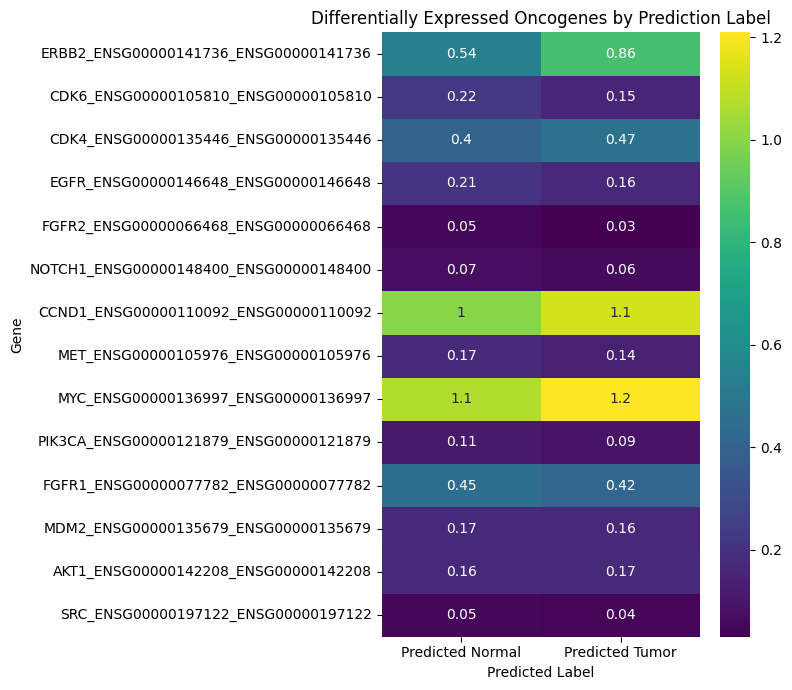

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Define genes of interest
genes_of_interest = [
    # Oncogenes only
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2"
]

# Adjust names to match format in var_names
genes_to_test = [gene for gene in adata.var_names if gene.split("_")[0] in genes_of_interest]

# Group labels
labels = adata.obs["tumor_pred_label_nomito"]

# Perform t-test and log2 fold change
results = []
for gene in genes_to_test:
    tumor_vals = adata[labels == "Predicted Tumor", gene].X.toarray().flatten()
    normal_vals = adata[labels == "Predicted Normal", gene].X.toarray().flatten()
    
    # Avoid divide-by-zero or invalid mean
    if tumor_vals.size > 1 and normal_vals.size > 1:
        t_stat, p_val = ttest_ind(tumor_vals, normal_vals, equal_var=False)
        mean_diff = tumor_vals.mean() - normal_vals.mean()
        log2_fc = np.log2((tumor_vals.mean() + 1e-5) / (normal_vals.mean() + 1e-5))
        results.append((gene, p_val, log2_fc, mean_diff))

# Create DataFrame and filter
df_de = pd.DataFrame(results, columns=["gene", "p_value", "log2_fc", "mean_diff"])
df_de = df_de.sort_values("p_value")
df_de_sig = df_de[df_de["p_value"] < 0.05]

# 🧪 Show significant DE oncogenes
print("✅ Differentially expressed oncogenes (p < 0.05):")
display(df_de_sig[["gene", "p_value", "log2_fc"]])

# 🔥 Prepare matrix for heatmap
heatmap_data = []
for gene in df_de_sig["gene"]:
    tumor_mean = adata[labels == "Predicted Tumor", gene].X.mean()
    normal_mean = adata[labels == "Predicted Normal", gene].X.mean()
    heatmap_data.append([normal_mean, tumor_mean])

df_heatmap = pd.DataFrame(
    heatmap_data,
    index=df_de_sig["gene"],
    columns=["Predicted Normal", "Predicted Tumor"]
).round(2)

# 📊 Plot heatmap
plt.figure(figsize=(8, len(df_heatmap) * 0.5))
sns.heatmap(df_heatmap, annot=True, cmap="viridis")
plt.title("Differentially Expressed Oncogenes by Prediction Label")
plt.xlabel("Predicted Label")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# List of differentially expressed oncogenes (from your earlier step)
oncogenes_de = [
    "ERBB2_ENSG00000141736_ENSG00000141736",
    "CDK6_ENSG00000105810_ENSG00000105810",
    "CDK4_ENSG00000135446_ENSG00000135446",
    "EGFR_ENSG00000146648_ENSG00000146648",
    "FGFR2_ENSG00000066468_ENSG00000066468",
    "NOTCH1_ENSG00000148400_ENSG00000148400",
    "CCND1_ENSG00000110092_ENSG00000110092",
    "MET_ENSG00000105976_ENSG00000105976",
    "MYC_ENSG00000136997_ENSG00000136997",
    "PIK3CA_ENSG00000121879_ENSG00000121879",
    "FGFR1_ENSG00000077782_ENSG00000077782",
    "MDM2_ENSG00000135679_ENSG00000135679",
    "AKT1_ENSG00000142208_ENSG00000142208",
    "SRC_ENSG00000197122_ENSG00000197122"
]

results = []

for gene in oncogenes_de:
    if gene in adata.var_names:
        # Extract gene expression vector
        gene_expr = adata[:, gene].X.toarray().flatten()
        cnv_score = adata.obs["cnv_score"]
        
        # Compute Spearman correlation
        corr, pval = spearmanr(gene_expr, cnv_score)
        results.append({
            "gene": gene,
            "spearman_corr": round(corr, 3),
            "p_value": "{:.2e}".format(pval)
        })

# Convert to DataFrame and sort
df_corr = pd.DataFrame(results).sort_values("spearman_corr", ascending=False)
display(df_corr)


,gene,spearman_corr,p_value
6,CCND1_ENSG00000110092_ENSG00000110092,0.432,0.00e+00
2,CDK4_ENSG00000135446_ENSG00000135446,0.429,0.00e+00
8,MYC_ENSG00000136997_ENSG00000136997,0.386,0.00e+00
0,ERBB2_ENSG00000141736_ENSG00000141736,0.330,0.00e+00
12,AKT1_ENSG00000142208_ENSG00000142208,0.310,0.00e+00
10,FGFR1_ENSG00000077782_ENSG00000077782,0.291,0.00e+00
3,EGFR_ENSG00000146648_ENSG00000146648,0.278,0.00e+00
1,CDK6_ENSG00000105810_ENSG00000105810,0.277,0.00e+00
11,MDM2_ENSG00000135679_ENSG00000135679,0.276,0.00e+00
7,MET_ENSG00000105976_ENSG00000105976,0.247,0.00e+00


In [ ]:
from anndata import AnnData

def load_sample(sample_prefix, data_dir, features_path):
    """
    Load a single sample (matrix + barcodes) from GSE161529 into an AnnData object.
    """
    matrix_fp = os.path.join(data_dir, f"{sample_prefix}-matrix.mtx.gz")
    barcodes_fp = os.path.join(data_dir, f"{sample_prefix}-barcodes.tsv.gz")
    
    # Load matrix (cells x genes)
    adata = sc.read_mtx(matrix_fp).T  # transpose to genes x cells

    # Load features and barcodes
    features = pd.read_csv(features_path, sep="\t", header=None)
    barcodes = pd.read_csv(barcodes_fp, header=None)
    
    # Set names
    adata.var_names = features[0].astype(str)
    adata.obs_names = barcodes[0].astype(str)
    adata.var_names_make_unique()
    
    # Store sample name
    adata.obs["sample"] = sample_prefix
    
    return adata

# Define paths
data_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")
features_path = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_features.tsv.gz")

# Get all unique sample prefixes from matrix file names
all_files = os.listdir(data_dir)
sample_prefixes = sorted(set(f.split("-matrix")[0] for f in all_files if f.endswith("-matrix.mtx.gz")))

# Load all samples and concatenate
adatas = []
for prefix in sample_prefixes:
    try:
        ad = load_sample(prefix, data_dir, features_path)
        adatas.append(ad)
        print(f"✅ Loaded: {prefix} with {ad.n_obs} cells")
    except Exception as e:
        print(f"❌ Failed to load {prefix}: {e}")

# Concatenate all into one AnnData
adata = adatas[0].concatenate(adatas[1:], join="outer", batch_key="sample_id", batch_categories=sample_prefixes)

#adata = ad.concat(adatas, join="outer", label="sample_id", keys=sample_prefixes)

print(f"\n🎉 Combined dataset: {adata.n_obs} cells × {adata.n_vars} genes across {len(adatas)} samples")

adata.obs["nCount_RNA"] = adata.X.sum(axis=1).A1
adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
adata.obs["percent.mito"] = (
    adata[:, adata.var["mt"]].X.sum(axis=1).A1 / adata.obs["nCount_RNA"]
) * 100
# Define ghost cells (but do NOT filter them out)
adata.obs["is_ghost"] = (
    (adata.obs["nCount_RNA"] < 1500) |
    (adata.obs["percent.mito"] < 15)
).astype(int)

# ✅ Summary
print(adata.obs["is_ghost"].value_counts())



✅ Loaded: GSM4909253_N-PM0092-Total with 4966 cells
✅ Loaded: GSM4909254_N-PM0019-Total with 7130 cells
✅ Loaded: GSM4909255_N-N280-Epi with 1198 cells
✅ Loaded: GSM4909256_N-PM0095-Epi with 9879 cells
✅ Loaded: GSM4909257_N-PM0095-Total with 7412 cells
✅ Loaded: GSM4909258_N-NF-Epi with 3015 cells
✅ Loaded: GSM4909259_N-NE-Epi with 3089 cells
✅ Loaded: GSM4909260_N-N1105-Epi with 5201 cells
✅ Loaded: GSM4909261_N-PM0230-Total with 3443 cells
✅ Loaded: GSM4909262_N-MH0064-Epi with 4785 cells
✅ Loaded: GSM4909263_N-MH0064-Total with 1678 cells
✅ Loaded: GSM4909264_N-N1B-Epi with 2157 cells
✅ Loaded: GSM4909265_N-PM0233-Total with 5665 cells
✅ Loaded: GSM4909266_N-MH0169-Total with 4605 cells
✅ Loaded: GSM4909267_N-MH0023-Epi with 3037 cells
✅ Loaded: GSM4909268_N-MH0023-Total with 7371 cells
✅ Loaded: GSM4909269_N-PM0342-Epi with 7856 cells
✅ Loaded: GSM4909270_N-PM0342-Total with 10178 cells
✅ Loaded: GSM4909271_N-MH288-Total with 2320 cells
✅ Loaded: GSM4909272_N-MH0021-Total with 246

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_20970/2677182047.py:46: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_all = adatas[0].concatenate(adatas[1:], join="outer", batch_key="sample_id", batch_categories=sample_prefixes)



🎉 Combined dataset: 428024 cells × 33538 genes across 69 samples
is_ghost
0    296131
1    131893
Name: count, dtype: int64


In [ ]:
print(adata.obs.head(3))
print(adata.obs.columns.tolist())

                                                                 sample  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   

                                                              sample_id  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   

                                              nCount_RNA  n_genes_by_counts  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total      3587.0               1359   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total      1003.0                510   
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total      7536.0               1893   

                                              total_counts  total_counts_mt  \
AA

In [ ]:
ribo_genes = [g for g in adata.var_names if g.startswith("RPS") or g.startswith("RPL")]
ribo_counts = adata[:, ribo_genes].X.sum(axis=1).A1
total_counts = adata.X.sum(axis=1).A1
adata.obs['pct_counts_ribo'] = (ribo_counts / total_counts) * 100

In [ ]:
print(adata.obs.columns.tolist())

['sample', 'sample_id', 'nCount_RNA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'percent.mito', 'pct_counts_ribo']


In [ ]:
from gtfparse import read_gtf
import pandas as pd
import urllib.request

import os
import urllib.request
from gtfparse import read_gtf

# Step 1: Download GTF if needed
gtf_url = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.annotation.gtf.gz"
gtf_file = "gencode.v44.annotation.gtf.gz"

if not os.path.exists(gtf_file):
    print("📥 Downloading GTF file...")
    urllib.request.urlretrieve(gtf_url, gtf_file)
else:
    print("✅ GTF file already exists.")

# Step 2: Read GTF
gtf_df = read_gtf(gtf_file).to_pandas()

# Step 3: Extract gene_id and gene_name
genes = gtf_df[gtf_df["feature"] == "gene"][["gene_id", "gene_name"]].drop_duplicates()

# Step 4: Strip version from Ensembl IDs
genes["gene_id_clean"] = genes["gene_id"].str.replace(r"\..*", "", regex=True)

# Step 5: Create mapping
ens_to_symbol = dict(zip(genes["gene_id_clean"], genes["gene_name"]))

# Step 6: Map gene symbols in adata.var
adata.var["ensembl_id"] = adata.var_names.str.replace(r"\..*", "", regex=True)
adata.var["gene_name"] = adata.var["ensembl_id"].map(ens_to_symbol)

# Step 7: Fill missing symbols with Ensembl ID, then set .var_names
# Step 7: Fill NaNs and ensure all entries are strings
adata.var["gene_name_clean"] = (
    adata.var["gene_name"].fillna(adata.var["ensembl_id"])
).astype(str)

# Set .var_names safely
adata.var_names = adata.var["gene_name_clean"]
adata.var_names_make_unique()


# ✅ Check first few gene names
print(adata.var_names[:10].tolist())

✅ GTF file already exists.


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


['MIR1302-2HG', 'FAM138A', 'OR4F5', 'ENSG00000238009', 'ENSG00000239945', 'ENSG00000239906', 'ENSG00000241599', 'ENSG00000236601', 'OR4F29', 'ENSG00000235146']


In [ ]:
# Identify mitochondrial genes by prefix
adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')

# Recalculate QC metrics with updated mitochondrial flags
import scanpy as sc
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

# Assign percent.mito (to match GSE176078 column naming)
adata.obs['percent.mito'] = adata.obs['pct_counts_mt']


In [ ]:
adata.obs.head(2)

,sample,sample_id,nCount_RNA,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,percent.mito,pct_counts_ribo,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,log1p_total_counts_mt
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,1359,3587.0,287.0,8.001115,8.001115,0.0,7.21524,8.185350,36.437134,50.683022,61.834402,76.052411,5.662961
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,510,1003.0,4.0,0.398804,0.398804,0.0,6.23637,6.911747,39.481555,53.738784,69.092722,99.002991,1.609438


In [ ]:
adata.obs = adata.obs[[
    'sample', 'sample_id', 'nCount_RNA', 'percent.mito'
]]


In [ ]:
adata.obs.head(2)

,sample,sample_id,nCount_RNA,percent.mito
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,8.001115
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.398804


In [ ]:
# Identify ribosomal genes (RPS or RPL)
ribo_genes = [g for g in adata.var_names if g.startswith("RPS") or g.startswith("RPL")]

# Total and ribosomal counts
total_counts = adata.X.sum(axis=1).A1
ribo_counts = adata[:, ribo_genes].X.sum(axis=1).A1

# Add to .obs
adata.obs['pct_counts_ribo'] = (ribo_counts / total_counts) * 100

# Sanity check
print(adata.obs['pct_counts_ribo'].describe())


count    428024.000000
mean         23.449614
std          10.560281
min           0.000000
25%          16.576088
50%          23.105051
75%          29.666750
max          82.282913
Name: pct_counts_ribo, dtype: float64


In [ ]:
# Define OxPhos genes
oxphos_genes = [
    "ATP5F1A", "ATP5F1B", "ATP5MC1", "ATP5MC2", "ATP5ME", "ATP5MG",
    "COX4I1", "COX5A", "COX6A1", "COX6C", "NDUFA1", "NDUFA2", "NDUFA4",
    "NDUFAB1", "NDUFB2", "NDUFB3", "NDUFS1", "NDUFS2", "NDUFV1", "UQCRC1",
    "UQCRC2", "UQCRH", "SDHA", "SDHB", "SDHC", "SDHD", "CYCS"
]

# Filter to genes present in dataset
oxphos_genes_present = [g for g in oxphos_genes if g in adata.var_names]

# Compute OxPhos score
import scanpy as sc
sc.tl.score_genes(adata, gene_list=oxphos_genes_present, score_name="oxphos_score")

# Check output
print(f"✅ OxPhos genes used: {len(oxphos_genes_present)}")
print(adata.obs["oxphos_score"].describe())

✅ OxPhos genes used: 27
count    428024.000000
mean          0.753553
std           1.715274
min          -6.576720
25%           0.046863
50%           0.259259
75%           0.780045
max          74.940287
Name: oxphos_score, dtype: float64


In [ ]:
## Apoptosis genes
apoptosis_genes = [
    "BAX", "BAK1", "BCL2", "BCL2L1", "BCL2L11", "CASP3", "CASP6", "CASP7",
    "CASP8", "CASP9", "TP53", "FAS", "FASLG", "TNFRSF10A", "TNFRSF10B",
    "TNFRSF1A", "TNF", "AIFM1", "APAF1", "BAD", "BID", "CFLAR", "DIABLO",
    "MCL1", "NFKB1", "NFKBIA", "TRADD", "XIAP"
]
apoptosis_genes_present = [g for g in apoptosis_genes if g in adata.var_names]
print(f"Apoptosis genes found in dataset: {len(apoptosis_genes_present)}")
sc.tl.score_genes(adata, gene_list=apoptosis_genes_present, score_name="apoptosis_score")
adata.obs["apoptosis_score"]


Apoptosis genes found in dataset: 28


AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total   -0.135342
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total    0.062697
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total   -0.068065
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total    0.049671
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total    0.136129
                                                  ...   
TTTGTCACATCGATTG-1-GSM4909321_mER-MH0068-LN    -0.023118
TTTGTCACATGTTCCC-1-GSM4909321_mER-MH0068-LN     0.175494
TTTGTCAGTAATTGGA-1-GSM4909321_mER-MH0068-LN    -0.030060
TTTGTCATCATGTCCC-1-GSM4909321_mER-MH0068-LN     0.032995
TTTGTCATCGCAAACT-1-GSM4909321_mER-MH0068-LN     0.018967
Name: apoptosis_score, Length: 428024, dtype: float64

In [ ]:
# Seurat v3 cell cycle gene sets (subset)
s_genes = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2',
    'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MCM10', 'HELLS', 'RFC2', 'RPA2',
    'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3',
    'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1',
    'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8'
]

g2m_genes = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80',
    'CKS2', 'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A',
    'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E',
    'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDC20', 'TTK', 'CDC25C', 'KIF2C',
    'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA3', 'HN1', 'CDC45', 'CDCA8', 'ECT2',
    'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE',
    'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'
]

# Check how many genes are found in your dataset
s_genes_present = [g for g in s_genes if g in adata.var_names]
g2m_genes_present = [g for g in g2m_genes if g in adata.var_names]

print(f"S phase genes found: {len(s_genes_present)}")
print(f"G2M phase genes found: {len(g2m_genes_present)}")

# Compute cell cycle scores
import scanpy as sc
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_present, g2m_genes=g2m_genes_present)

# Check output columns added
print(adata.obs[["S_score", "G2M_score", "phase"]].head())

S phase genes found: 43
G2M phase genes found: 52
                                               S_score  G2M_score phase
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total -0.267442  -0.172494    G1
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total -0.042636  -0.047786    G1
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total -0.428295  -0.325175    G1
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total -0.451550  -0.168998    G1
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total -0.058140  -0.006993    G1


In [ ]:
ghost_condition = (
    (adata.obs['nCount_RNA'] < 1500) |
    (adata.obs['percent.mito'] > 15) |
    (adata.obs['pct_counts_ribo'] < 8) |
    (adata.obs['apoptosis_score'] > 0.5) |
    (adata.obs['oxphos_score'] < 0.5)
)
adata.obs['ghost_class'] = ghost_condition.astype(int)

In [ ]:
## Protooncogene score
proto_oncogenes = ['MYC', 'KRAS', 'EGFR', 'BRAF', 'AKT1', 'PIK3CA', 'CCND1', 'ERBB2', 'FGFR1', 'MDM2']

# ---------------------------------------
# 🧪 Step 2: Score Proto-oncogene activity
# Filter to genes in adata
valid_protooncogenes = [g for g in proto_oncogenes if g in adata.var_names]
sc.tl.score_genes(adata, gene_list=oxphos_genes_present, score_name="proto_oncogenescore")
print(f"✅ Found {len(valid_protooncogenes)} Proto-oncogenes in dataset: {valid_protooncogenes}")


✅ Found 10 Proto-oncogenes in dataset: ['MYC', 'KRAS', 'EGFR', 'BRAF', 'AKT1', 'PIK3CA', 'CCND1', 'ERBB2', 'FGFR1', 'MDM2']


In [ ]:
adata.obs.columns

Index(['sample', 'sample_id', 'nCount_RNA', 'percent.mito', 'pct_counts_ribo',
       'oxphos_score', 'apoptosis_score', 'S_score', 'G2M_score', 'phase',
       'proto_oncogenescore'],
      dtype='object')

In [ ]:
import os
import urllib.request
import scanpy as sc
import pandas as pd
import numpy as np
import infercnvpy as cnv
from gtfparse import read_gtf
import gc

import time
import psutil
gtf_url = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.annotation.gtf.gz"
gtf_file = "gencode.v44.annotation.gtf.gz"

if not os.path.exists(gtf_file):
     print("📥 Downloading GTF file...")
     urllib.request.urlretrieve(gtf_url, gtf_file)
else:
     print("✅ GTF file already exists.")

gtf_df = read_gtf(gtf_file).to_pandas()

# Step 2: Filter to gene features
genes = gtf_df[gtf_df["feature"] == "gene"]

# Step 3: Select and clean required columns
gene_pos = genes[["gene_name", "seqname", "start", "end"]].drop_duplicates()
gene_pos.columns = ["gene", "chromosome", "start", "end"]


 ### 🧬 STEP 3: Add Gene Coordinates to `adata_sub.var`
adata.var["gene"] = adata.var_names
gene_pos_filtered = gene_pos[gene_pos["gene"].isin(adata.var["gene"])].drop_duplicates(subset="gene")
gene_pos_filtered = gene_pos_filtered.set_index("gene")

# # Join gene coordinate info
merged_var = adata.var.join(gene_pos_filtered, on="gene")
merged_var = merged_var.reindex(adata.var_names)
adata.var = merged_var

### 🧾 STEP 4: Define CNV Reference Groups
# Use sample naming logic: normal samples have prefix "N-", others are tumor
adata.obs["cnv_reference"] = "tumor"
adata.obs.loc[adata.obs["sample_id"].str.startswith("GSM490925"), "cnv_reference"] = "normal"

print("🔍 CNV reference group counts:\n", adata.obs["cnv_reference"].value_counts())


#  Step 8: Clean memory before heavy step
gc.collect()

# 🧪 Step 9: Run CNV inference
print(f"🧠 Memory usage before: {psutil.virtual_memory().percent}%")
start_time = time.time()
print("🚀 Starting CNV inference...")


start_time = time.time()
print("🚀 Starting CNV inference...")

# Optional: Print initial memory use
print(f"🧠 Memory usage before: {psutil.virtual_memory().percent}%")

# ### 🚀 STEP 5: Run inferCNV
# # This step performs CNV inference based on chromosome windows
cnv.tl.infercnv(
     adata,
     reference_key="cnv_reference",
     reference_cat="normal",
     window_size=100,
     step=10,
     n_jobs=4  # reduce to 2 if low memory
)
end_time = time.time()
print(f"✅ CNV inference completed in {(end_time - start_time)/60:.2f} minutes.")
print(f"🧠 Memory usage after: {psutil.virtual_memory().percent}%")

✅ GTF file already exists.


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


🔍 CNV reference group counts:
 cnv_reference
tumor     391335
normal     36689
Name: count, dtype: int64
🧠 Memory usage before: 54.0%
🚀 Starting CNV inference...
🚀 Starting CNV inference...
🧠 Memory usage before: 54.0%


  0%|          | 0/86 [00:00<?, ?it/s]

✅ CNV inference completed in 5.79 minutes.
🧠 Memory usage after: 42.4%


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

# 🧬 Step 1: Clean and standardize chromosome names
adata.var["chromosome"] = (
    adata.var["chromosome"].astype(str)
    .str.replace("chr", "")
    .str.upper()
)

# 🧬 Step 2: Select CNV-affected chromosomes (data-driven)
selected_chroms = ["11", "19", "6", "X", "12", "16"]  # Derived from your output

# 🧬 Step 3: Subset genes on those chromosomes
cnv_genes = adata.var[adata.var["chromosome"].isin(selected_chroms)]

# 🧬 Step 4: Subset the data to those genes
adata_cnv = adata[:, cnv_genes.index].copy()

# 🧬 Step 5: Normalize gene expression (Z-score per gene)
sc.pp.scale(adata_cnv, zero_center=True, max_value=10)

# 🧬 Step 6: Compute CNV score (mean absolute Z-score per cell)
adata.obs["cnv_score"] = np.abs(adata_cnv.X).mean(axis=1)

# # 📊 Optional: Visualize CNV score distribution by ghost class
# plt.figure(figsize=(6, 4))
# sns.violinplot(data=adata.obs, x="ghost_class", y="cnv_score")
# plt.title("CNV Score by Ghost Class")
# plt.xlabel("Ghost Class")
# plt.ylabel("Mean CNV Score")
# plt.tight_layout()
# plt.show()

In [ ]:
adata.obs['ghost_class'] = (
    (adata.obs['nCount_RNA'] < 1500) |
    (adata.obs['percent.mito'] > 15) |
    (adata.obs['pct_counts_ribo'] < 8) |
    (adata.obs['apoptosis_score'] > 0.5) |
    (adata.obs['oxphos_score'] < 0.5) |
    (adata.obs['proto_oncogenescore'] < 0.25) |
    (adata.obs['cnv_score'] < 0.15) |
    ((adata.obs['S_score'] < 0.1) & (adata.obs['G2M_score'] < 0.1)) |
    (adata.obs['phase'].isin(['G1', 'NA'])) |
    (adata.obs.get('dpt_pseudotime', 1) < 0.1)  # if available
).astype(int)

print("🔍 Refined ghost cell counts:")
print(adata.obs['ghost_class'].value_counts())


🔍 Refined ghost cell counts:
ghost_class
1    414000
0     14024
Name: count, dtype: int64


In [ ]:
adata.obs.head(5)

,sample,sample_id,nCount_RNA,percent.mito,pct_counts_ribo,oxphos_score,apoptosis_score,S_score,G2M_score,phase,proto_oncogenescore,cnv_reference,cnv_score
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,8.001115,34.011711,0.625094,-0.135342,-0.267442,-0.172494,G1,0.625094,normal,0.157648
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.398804,41.375874,0.034769,0.062697,-0.042636,-0.047786,G1,0.034769,normal,0.117910
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,7536.0,2.295648,34.262207,0.494331,-0.068065,-0.428295,-0.325175,G1,0.494331,normal,0.191446
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,10366.0,3.935944,27.532318,1.197279,0.049671,-0.451550,-0.168998,G1,1.197279,normal,0.246197
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1628.0,2.641278,29.545454,-0.016629,0.136129,-0.058140,-0.006993,G1,-0.016629,normal,0.136386


In [ ]:
adata.obs.to_csv("GSE161529_complete_features_mito.csv")

In [ ]:
import scanpy as sc
from scipy import sparse

# Step 0: Ensure adata.X is float (especially for sparse matrices)
if sparse.issparse(adata.X):
    adata.X = adata.X.astype("float32")
else:
    adata.X = adata.X.astype("float32")

# Step 1: Compute PCA (if not already done)
sc.pp.pca(adata, n_comps=50)

# Step 2: Compute neighbors
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)

# Step 3: Compute diffusion map — use reasonable number of components
sc.tl.diffmap(adata, n_comps=15)

# Step 4: Define root cell — pick a "normal" cell with lowest proto_oncogenescore
if 'proto_oncogenescore' in adata.obs.columns:
    root_cell_name = adata.obs['proto_oncogenescore'].idxmin()
    root_cell_index = adata.obs_names.get_loc(root_cell_name)
    adata.uns['iroot'] = root_cell_index
else:
    raise ValueError("❌ 'proto_oncogenescore' not found in adata.obs")

# Step 5: Compute pseudotime
sc.tl.dpt(adata)

# Step 6: Confirm
print("✅ 'dpt_pseudotime' added to adata.obs:", 'dpt_pseudotime' in adata.obs.columns)


2025-07-07 23:41:17.174926: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

✅ 'dpt_pseudotime' added to adata_all.obs: True


In [ ]:
adata.obs.head(2)

,sample,sample_id,nCount_RNA,percent.mito,is_ghost,pct_counts_ribo,oxphos_score,apoptosis_score,S_score,G2M_score,phase,ghost_class,proto_oncogenescore,cnv_reference,cnv_score,dpt_pseudotime
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,3587.0,0.0,0,34.011711,0.625094,-0.135342,-0.267442,-0.172494,G1,1,0.625094,normal,0.157648,0.038259
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,GSM4909253_N-PM0092-Total,1003.0,0.0,1,41.375874,0.034769,0.062697,-0.042636,-0.047786,G1,1,0.034769,normal,0.117910,0.076298


In [ ]:
adata.obs.to_csv("GSE161529_obs_features_total.csv")